In [96]:
import string
import nltk
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [114]:
title_file = 'Leroux_ThePhantomOfTheOpera_Gutenberg.txt'
title = "The Phantom of the Opera"

In [115]:
def tokenize_text(filename):
    """
    This function generates a list of tokens with punctuation
    stopwords, and spaces removed for the whole text.
    """
    text_tokens = []

    file_path = "./corpora/" + filename
    stop = list(set(stopwords.words('english')))
    punc = [p for p in string.punctuation]
    stop_punc = stop + punc + ["''", '``']

    text = open(file_path, 'r')

    for row in text:
        tokens = pos_tag(word_tokenize(row.lower()))
        if len(tokens) is not 0:
            # puts everything in lowercase, removes punctuation and stopwords
            tokens = [token for token in tokens if token[0] not in stop_punc]
            # adds row tokens to master list
            text_tokens.extend(tokens)

    return text_tokens

In [117]:
tokenized = tokenize_text(title_file)

In [99]:
print(tokenized[300:320])

[('memoirs', 'NNS'), ('manager', 'NN'), ('light', 'NN'), ('frivolous', 'JJ'), ('work', 'NN'), ('too-skeptical', 'JJ'), ('moncharmin', 'NN'), ('term', 'NN'), ('opera', 'NN'), ('understood', 'JJ'), ('nothing', 'NN'), ('mysterious', 'JJ'), ('behavior', 'NN'), ('ghost', 'NN'), ('making', 'VBG'), ('fun', 'NN'), ('could', 'MD'), ('moment', 'NN'), ('became', 'VBD'), ('first', 'JJ')]


In [152]:
def id_color_words():
    """
    Gets color words from the csv file and puts them into a dict where key = word
    and value = (hex value, color family).
    """
    color_word_dict = {}
    modern_color_words = []
    color_data = csv.reader(open('./color_names.csv'), delimiter=",", quotechar='"')
    next(color_data, None)

    for row in color_data:
        name = row[0].lower()
        year = int(row[1])
        if ' ' not in name:
            if year < 1914:
                family = row[2].lower()
                hex_value = row[3].lower()
                color_word_dict[name] = (hex_value, family)
            else:
                modern_color_words.append((year, name))
                   
    return color_word_dict, modern_color_words

In [153]:
color_dict, modern_color_words = id_color_words()
print("There are %d color words in our dictionary that were in use before 1914, per the OED." % len(color_dict))
print()
sample_colors = list(color_dict.keys())[300:340]
print("Here is a sample - first value is the HTML color, the second is the color family.")
for s in sample_colors:
    print(s, ":", color_dict[s])

There are 980 color words in our dictionary that were in use before 1914, per the OED.

Here is a sample - first value is the HTML color, the second is the color family.
flammeous : ('orangered', 'orange-red')
rosen : ('pink', 'rose-red or pink')
rose-red : ('pink', 'rose-red or pink')
rosy : ('pink', 'rose-red or pink')
roseate : ('pink', 'rose-red or pink')
roset : ('pink', 'rose-red or pink')
rosing : ('pink', 'rose-red or pink')
rose-coloured : ('pink', 'rose-red or pink')
rose-like : ('pink', 'rose-red or pink')
roseal : ('pink', 'rose-red or pink')
rosal : ('pink', 'rose-red or pink')
rosy-fingered : ('pink', 'rose-red or pink')
carnation : ('pink', 'pale-red or pink')
damask : ('pink', 'rose-red or pink')
rosied : ('red', 'made red')
damasked : ('pink', 'rose-red or pink')
roseac : ('pink', 'rose-red or pink')
rose : ('pink', 'rose-red or pink')
rosaceous : ('pink', 'rose-red or pink')
rose-tinted : ('pink', 'rose-red or pink')
blush-rose : ('pink', 'rose-red or pink')
incarnate

In [165]:
def word_order(t, color_dict):
    colors = color_dict.keys()
    for i in range(len(t)-1):
        if 'JJ' in t[i][1] and 'NN' in t[i+1][1] and t[i][0] in colors:
            print("JJ, NN", t[i], t[i + 1])
        elif'JJ' in t[i+1][1] and 'NN' in t[i][1] and t[i+1][0] in colors:
            print("NN, JJ", t[i], t[i + 1])
word_order(tokenized, color_dict)

NN, JJ ('mystery', 'NN') ('yellow', 'JJ')
JJ, NN ('yellow', 'JJ') ('room', 'NN')
NN, JJ ('lady', 'NN') ('black', 'JJ')
JJ, NN ('black', 'JJ') ('contents', 'NNS')
NN, JJ ('eyes', 'NNS') ('rose-red', 'JJ')
JJ, NN ('rose-red', 'JJ') ('cheeks', 'NN')
NN, JJ ('cheeks', 'NN') ('lily-white', 'JJ')
JJ, NN ('lily-white', 'JJ') ('neck', 'NN')
NN, JJ ('eyes', 'NNS') ('black', 'JJ')
JJ, NN ('black', 'JJ') ('sloes', 'NNS')
JJ, NN ('black', 'JJ') ('ink', 'NN')
JJ, NN ('black', 'JJ') ('holes', 'NNS')
NN, JJ ('drumhead', 'NN') ('white', 'JJ')
JJ, NN ('coral', 'JJ') ('finger-ring', 'NN')
JJ, NN ('pink', 'JJ') ('legs', 'NNS')
JJ, NN ('blue', 'JJ') ('eyes', 'NNS')
JJ, NN ('white', 'JJ') ('sheet', 'NN')
JJ, NN ('black', 'JJ') ('cavities', 'NNS')
JJ, NN ('black', 'JJ') ('ink', 'NN')
NN, JJ ('paragraph', 'NN') ('red', 'JJ')
JJ, NN ('red', 'JJ') ('ink', 'NN')
JJ, NN ('red', 'JJ') ('ink', 'NN')
JJ, NN ('red', 'JJ') ('ink', 'NN')
JJ, NN ('red', 'JJ') ('handwriting', 'NN')
JJ, NN ('blue', 'JJ') ('pencil', 'NN')

In [102]:
print("Here are the post-1914 words and the year of first usage according to the Oxford English Dictionary.")
print("The 20th century ushered in food-related color words including avocado, citron, cocoa, mustard, pimento & toffee.")
print()
print(sorted(modern_color_words, key=lambda x: x[0]))

Here are the post-1914 words and the year of first usage according to the Oxford English Dictionary.
The 20th century ushered in food-related color words including avocado, citron, cocoa, mustard, pimento & toffee.

[(1918, 'oxblood'), (1918, 'jacobean'), (1918, 'shadow-grey'), (1919, 'mustard'), (1921, 'tony'), (1921, 'pimento'), (1922, 'nude'), (1922, 'straw-pale'), (1923, 'alizarin'), (1923, 'sahara'), (1923, 'blue-brilliant'), (1923, 'sahara'), (1924, 'citron'), (1924, 'hennaed'), (1927, 'greige'), (1928, 'mimosa'), (1931, 'off-white'), (1931, 'magnolia-pink'), (1934, 'safari'), (1935, 'salmony'), (1937, 'seaweed-green'), (1938, 'guinea-gold'), (1941, 'xanthophyllic'), (1941, 'prune-dark'), (1942, 'cocoa'), (1946, 'whale-blue'), (1947, 'avocado'), (1949, 'saffronic'), (1950, 'wine'), (1951, 'bone-coloured'), (1953, 'bible-black'), (1953, 'pinko-grey'), (1961, 'toffee-brown'), (1962, 'toffee'), (1962, 'peppery'), (1963, 'pimiento'), (1963, 'magnolia'), (1965, 'lily-green'), (1965, '

In [103]:
def color_words(c_dict, text):
    tags = ['NN', 'JJ']
    color_names = list(c_dict.keys())
    color_words = [w for w in text if w[0] in color_names and w[1] in tags]
    
    return color_words

In [104]:
color_in_text = color_words(color_dict, tokenized)

In [105]:
print(color_in_text[:15])

[('yellow', 'JJ'), ('black', 'JJ'), ('mourning', 'NN'), ('rose-red', 'JJ'), ('lily-white', 'JJ'), ('black', 'JJ'), ('black', 'JJ'), ('black', 'JJ'), ('white', 'JJ'), ('yellow', 'NN'), ('plum', 'NN'), ('glass', 'NN'), ('red', 'JJ'), ('coral', 'JJ'), ('pink', 'NN')]


In [106]:
nouns = Counter([n[0] for n in color_in_text if n[1] == 'NN'])
adjectives = Counter([a[0] for a in color_in_text if a[1] == 'JJ'])

In [107]:
print("*** Nouns ***")
print(nouns)
print("*** Adjectives ***")
print(adjectives)

*** Nouns ***
Counter({'water': 56, 'glass': 24, 'iron': 20, 'stone': 19, 'gold': 10, 'bronze': 5, 'pink': 4, 'snow': 4, 'marble': 4, 'rush': 3, 'crimson': 3, 'champagne': 2, 'wan': 2, 'blush': 2, 'scarlet': 2, 'bluey': 2, 'mahogany': 2, 'mourning': 1, 'yellow': 1, 'plum': 1, 'navy': 1, 'peacock': 1, 'straw': 1, 'ivory': 1, 'copper': 1, 'chocolate': 1, 'blue': 1, 'candid': 1, 'purple': 1, 'incarnate': 1, 'mole': 1, 'inky': 1, 'stony': 1, 'gunpowder': 1, 'violet': 1})
*** Adjectives ***
Counter({'red': 45, 'black': 40, 'white': 30, 'rosy': 9, 'yellow': 8, 'blue': 8, 'marble': 7, 'golden': 5, 'leaden': 3, 'candid': 2, 'green': 2, 'rose-red': 1, 'lily-white': 1, 'coral': 1, 'pink': 1, 'purple': 1, 'smoky': 1, 'glaucous': 1, 'rusty': 1, 'metallic': 1, 'pitchy': 1})


In [128]:
pct_color_words = round((len(color_in_text)/len(tokenized))*100, 2)
print("%s is %s percent color words."% (title, pct_color_words))

The Phantom of the Opera is 0.84 percent color words.


In [129]:
def group_to_plot(color_dict, c_i_t):
    color_summary = defaultdict(int)
    for c in c_i_t:
        color_summary[color_dict[c[0]][0]] += 1
    color_sum = OrderedDict(sorted(color_summary.items(), key=lambda t: t[1]))
    return color_sum

In [130]:
html_color_counts = group_to_plot(color_dict, color_in_text)
print(html_color_counts)

OrderedDict([('floralwhite', 1), ('darkblue', 1), ('turquoise', 1), ('lightyellow', 1), ('whitesmoke', 1), ('ivory', 1), ('sienna', 1), ('steelblue', 1), ('blueviolet', 1), ('papayawhip', 2), ('green', 2), ('purple', 3), ('firebrick', 3), ('crimson', 3), ('snow', 4), ('darkred', 4), ('slategrey', 5), ('darkgoldenrod', 5), ('yellow', 9), ('blue', 12), ('white', 14), ('gold', 15), ('pink', 18), ('lightslategrey', 20), ('dimgrey', 21), ('lightseagreen', 25), ('silver', 30), ('black', 42), ('red', 48), ('cadetblue', 57)])


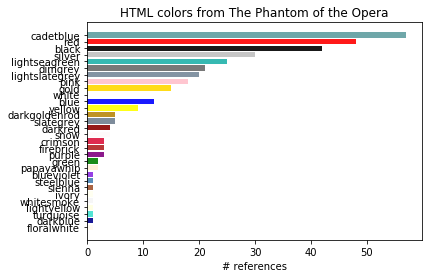

In [131]:
colors = list(html_color_counts.keys())
counts = list(html_color_counts.values())
y_pos = np.arange(len(counts))

plt.barh(y_pos, counts, align='center', alpha=0.9, color=colors)
plt.yticks(y_pos, colors)
plt.xlabel('# references')
plt.title('HTML colors from ' + title)
 
plt.show()

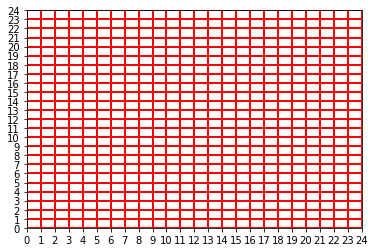

In [148]:
color_labels = [c[0] for c in color_in_text]
html_color_list = [color_dict[c][0] for c in color_labels]

cmap = html_color_list
bounds = [0,10,20]

fig, ax = plt.subplots()
ax.grid(which='major', linestyle='-', color='red', linewidth=2)
ax.set_xticks(np.arange(0, 25, 1));
ax.set_yticks(np.arange(0, 25, 1));

plt.show()